# TensorFlow 2 quickstart for beginners

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

![MNIST](..\img\MnistExamples.png)

In [1]:
import tensorflow.keras as ks
import tensorflow as tf
mnist = ks.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
#attention: usig matplot and tensorflow in the same noetbooks may cause crashes

# from matplotlib import pyplot as plt
# plt.imshow(x_train[0], interpolation='nearest')
# plt.show()

# print("Label: ", y_train[0])

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


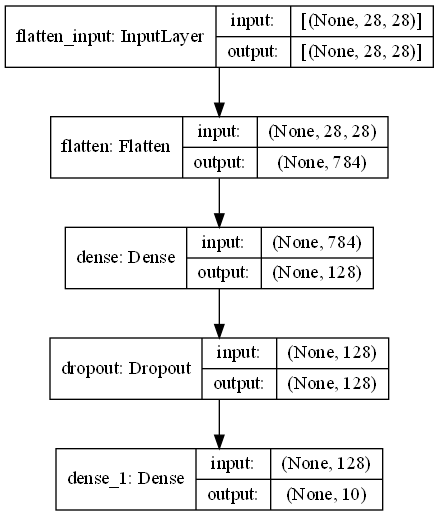

In [3]:
model = ks.models.Sequential([
  ks.layers.Flatten(input_shape=(28, 28)),
  ks.layers.Dense(128, activation='relu'),
  ks.layers.Dropout(0.2),
  ks.layers.Dense(10)
])

model.summary()

tf.keras.utils.plot_model(
model, to_file='../img/model_plot.png', show_shapes=True, show_layer_names=True)

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.4583095 ,  0.37722456, -0.56152254, -0.11123493, -0.5207801 ,
         1.0886227 , -0.342359  , -0.03449332, -0.06184512, -0.43786576]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.0609113 , 0.14046422, 0.05493802, 0.08618475, 0.05722255,
        0.2861027 , 0.06839976, 0.09305911, 0.09054827, 0.06216937]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This *untrained model* gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [7]:
loss_fn(y_train[:1], predictions).numpy()

1.2514044

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


## Train and evaluate your model
Now its tiem to **train** our model, meanning we use labled data to tune our model such that the predicted labels mach as closely as possible to the actual labels. We do this over many *steps* in multiple *epochs*;

* Epoch: A training epoch represents a complete use of all training data for gradients calculation and optimizations(train the model).

* Step: A training step means using one batch size of training data to train the model.

Use the `Model.fit` method to adjust your model parameters and minimize the loss (i.e. *train* the model). The training will take up to a minute and you can ovserve how the loss and accuracy on the test dataset change over time: 

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9674: 0s - loss: 0.1077 - ac
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0746 - accuracy: 0.9760: 



Congartualtions! you just trained your first Neural Network model!


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

For this we let the model predict the label of a dataset it was not trained on and check how acurate it was.

In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0745 - accuracy: 0.9774


[0.07445459812879562, 0.977400004863739]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

For example, lets predict the label of the first entry in the test dataset

In [12]:
import numpy as np
Prediction= probability_model(x_test[:1])


print("True Label: {} \nPredicted Label: {} with probability: {:0.3f} %".format(np.argmax(Prediction),y_test[0] ,Prediction[0,np.argmax(Prediction)]*100))

True Label: 7 
Predicted Label: 7 with probability: 99.977 %


## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


*adapted from : https://www.tensorflow.org/tutorials/quickstart/beginner*